# Проверка статистических гипотез

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats as s_tests
from numpy.random import seed

In [2]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

# Гипотеза о равенстве математического ожидания постоянному значению

Известно, что генеральная совокупность распределена нормально. Кроме того есть основания полагать, что математическое ожидание $m$  равна некоторому фиксированному значению  ${m}_{0}$. Для проверки этого утверждения выдвинем гипотезу ${H}_{0}:m={m}_{0}$.

Если дисперсия известна, то для проверки это гипотезы используем $z$-статистику
$$z = \frac {M(x) - {m}_{0}}{\sigma / \sqrt n}$$
Если дисперсия неизвестна, то для проверки это гипотезы используем $t$-статистику (статистику Стьюдента)
$$t = \frac {M(x) - {m}_{0}}{D(X) / \sqrt n}$$
Далее нужно вычислить значение ${p}_{value}$ соответствующее полученному критерию, и сравнить с уровнем значимости.

Для гипотезы ${H}_{0}$  существует несколько альтернативных гипотез:

${H}_{1}:m<{m}_{0}$, то необходимо использовать левосторонний критерий, т.е. ${p}_{value}=P[z<=c]$ (smaller)

${H}_{1}:m>{m}_{0}$, то необходимо использовать правосторонний критерий, т.е. ${p}_{value}=1-P[z<c]$ (larger)

${H}_{1}:m\neq{m}_{0}$, то необходимо использовать двусторонний критерий, т.е. ${p}_{value}=2\min[P[z<=c], 1-P[z<c]]$ (two-sided)

# Z-критерий

[ 4.72635041  3.34081629  6.27157266  7.36047649  4.4752749   2.42426742
  6.57491895  6.07827066 -0.24193306  2.44141349  2.88836474  5.25228708
  4.57402446  4.07037797 -0.25305557 -0.25515808  2.90450076  2.40033597
  4.57615802  6.9917029   6.80468131  2.68576806  3.6746223   3.35978321
  5.9886216   2.23341461  3.53722888  4.9575777  -0.94666137  5.56411863
  2.38114142  2.75798256  5.4895814   1.83515559  6.51480405  4.10850066
  4.64693172  6.53977157  1.44297095  5.57894812  3.93873884  4.91689887
  4.60633677  3.40775638  3.60726144  3.01656268  5.90911756  4.90976664
  5.36374644  3.33481037  6.51149859  5.81349163  3.17443256  5.0816188
  7.01616916  1.75802977  3.8583938   1.93913351  4.24906311  5.03508366
  4.87867477  7.82449602  5.28454031 -0.60766326  3.36981411  5.88971354
  2.35935247  4.44506527  4.12080377  3.53554602  6.13824853  5.13844864
  2.35983882  4.81689481  3.01670365  4.69971196  4.5786447   7.06109054
  6.46252467  4.2807801   4.04835405  3.93292858  5.

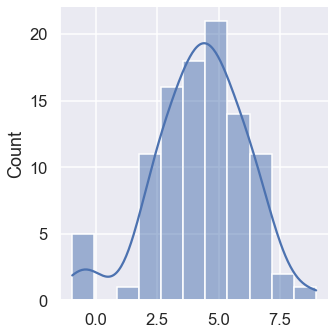

In [3]:
n = 100
sigma = 2.
m = 4.3

# генерируем выборку
x = np.random.normal(m, sigma, (n, ))
print(x)

mean_x = x.mean()
print(f'Оценка мат. ожидания: {mean_x:.3f}')
sns.displot(x, kde=True)

# Вычислим оценку среднеквадратического отклонения
sigma_x = x.std()
print(f'Оценка СКО: {sigma_x:.4f}')

In [5]:
print(round(1-stats.norm.cdf(1.645), 2))
print(round(1-stats.norm.cdf(2.33), 2))
print(round(1-stats.norm.cdf(3.1), 3))

0.05
0.01
0.001


[0.02073047 0.02074695 0.0207634  ... 0.00826976 0.00826216 0.00825456]
[ 7.29316465  7.34840619  7.40364773  7.45888927  7.5141308   7.56937234
  7.62461388  7.67985542  7.73509695  7.79033849  7.84558003  7.90082157
  7.9560631   8.01130464  8.06654618  8.12178772  8.17702926  8.23227079
  8.28751233  8.34275387  8.39799541  8.45323694  8.50847848  8.56372002
  8.61896156  8.67420309  8.72944463  8.78468617  8.83992771  8.89516925
  8.95041078  9.00565232  9.06089386  9.1161354   9.17137693  9.22661847
  9.28186001  9.33710155  9.39234309  9.44758462  9.50282616  9.5580677
  9.61330924  9.66855077  9.72379231  9.77903385  9.83427539  9.88951692
  9.94475846 10.        ]


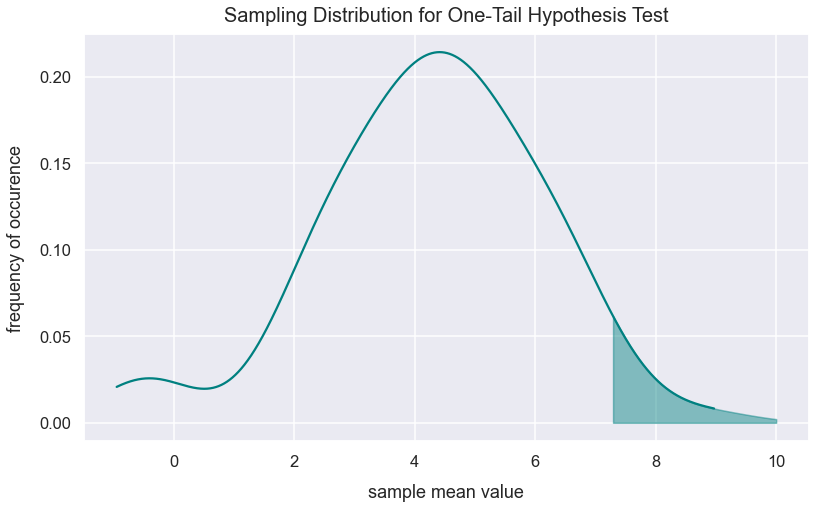

In [6]:
two_std_from_mean = np.mean(x) + np.std(x)*1.645 #aplha = 0.05
kde = stats.gaussian_kde(x)
pos = np.linspace(np.min(x), np.max(x), 10000)
print(kde(pos))
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 10)
print(shade)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title("Sampling Distribution for One-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

In [14]:
standard_error = sigma / np.sqrt(n)
z_score = (mean_x - 4.5)/standard_error
print(f'Значение z-статистики: {z_score:.4f}')

Значение z-статистики: -0.1590


In [15]:
alpha = 0.05
p = stats.norm.cdf(z_score)
print(f'Значение p-value: {p:.4f}')
if p > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение p-value: 0.4368
Основная гипотеза принимается


In [16]:
ztest, pvalue = s_tests.ztest(x, value=4.5, alternative='smaller')
print(f'Значение z-статистики: {ztest:.4f}')
print(f'Значение p-value: {pvalue:.4f}')
if pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение z-статистики: -0.1716
Значение p-value: 0.4319
Основная гипотеза принимается


In [17]:
p = 1 - stats.norm.cdf(z_score)
print(f'Значение p-value: {p:.4f}')
if p > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение p-value: 0.5632
Основная гипотеза принимается


In [18]:
ztest, pvalue = s_tests.ztest(x, value=4.5, alternative='larger')
print(f'Значение z-статистики: {ztest:.4f}')
print(f'Значение p-value: {pvalue:.4f}')
if pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение z-статистики: -0.1716
Значение p-value: 0.5681
Основная гипотеза принимается


In [19]:
standard_error = sigma / np.sqrt(n)
z_score = (mean_x - 5.5)/standard_error
print(f'Значение z-статистики: {z_score:.4f}')
p = stats.norm.cdf(z_score)
print(f'Значение p-value: {p:.4f}')
if p > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')
    
ztest, pvalue = s_tests.ztest(x, value=5.5, alternative='smaller')
print(f'Значение z-статистики: {ztest:.4f}')
print(f'Значение p-value: {pvalue:.4f}')
if pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение z-статистики: -5.1590
Значение p-value: 0.0000
Основная гипотеза отклоняется
Значение z-статистики: -5.5685
Значение p-value: 0.0000
Основная гипотеза отклоняется


In [20]:
standard_error = sigma / np.sqrt(n)
z_score = (mean_x - 3.5)/standard_error
print(f'Значение z-статистики: {z_score:.4f}')
p = 1 - stats.norm.cdf(z_score)
print(f'Значение p-value: {p:.4f}')
if p > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')
    
ztest, pvalue = s_tests.ztest(x, value=3.5, alternative='larger')
print(f'Значение z-статистики: {ztest:.4f}')
print(f'Значение p-value: {pvalue:.4f}')
if pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение z-статистики: 4.8410
Значение p-value: 0.0000
Основная гипотеза отклоняется
Значение z-статистики: 5.2253
Значение p-value: 0.0000
Основная гипотеза отклоняется


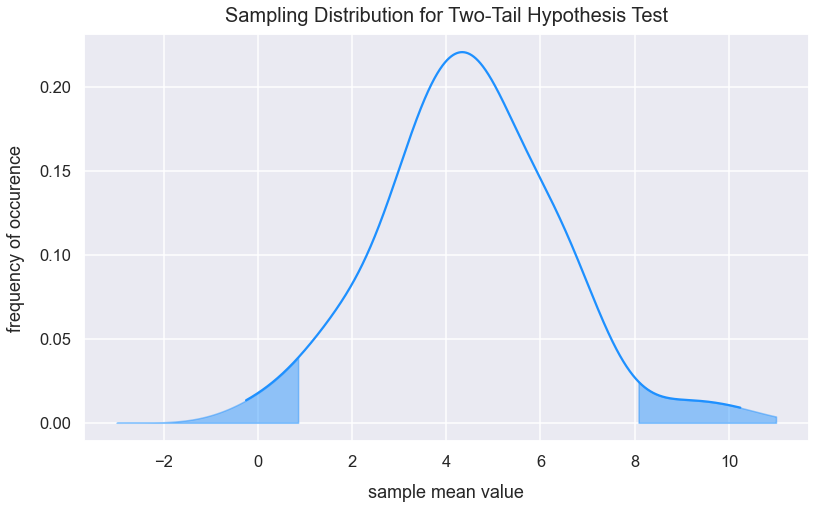

In [21]:
alpha_05_positive = np.mean(x) + np.std(x)*1.96 #alpha=0.05/2
alpha_05_negative = np.mean(x) - np.std(x)*1.96
kde = stats.gaussian_kde(x)
pos = np.linspace(np.min(x), np.max(x), 10000)
plt.plot(pos, kde(pos), color='dodgerblue')
shade = np.linspace(alpha_05_positive, 11, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')
shade2 = np.linspace(alpha_05_negative, -3, 300)
plt.fill_between(shade2, kde(shade2), alpha=0.45, color='dodgerblue')
plt.title("Sampling Distribution for Two-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

In [22]:
alpha = 0.05
p = 2*min(stats.norm.cdf(z_score), (1 - stats.norm.cdf(z_score)))
print(f'Значение p-value: {p:.4f}')
if p > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение p-value: 0.0000
Основная гипотеза отклоняется


In [23]:
ztest, pvalue = s_tests.ztest(x, value=5.5, alternative='two-sided')
print(f'Значение z-статистики: {ztest:.4f}')
print(f'Значение p-value: {pvalue:.4f}')
if pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение z-статистики: -5.5685
Значение p-value: 0.0000
Основная гипотеза отклоняется


# Статистика Стьюдента

Оценка мат. ожидания: 4.004
Оценка СКО: 1.9858


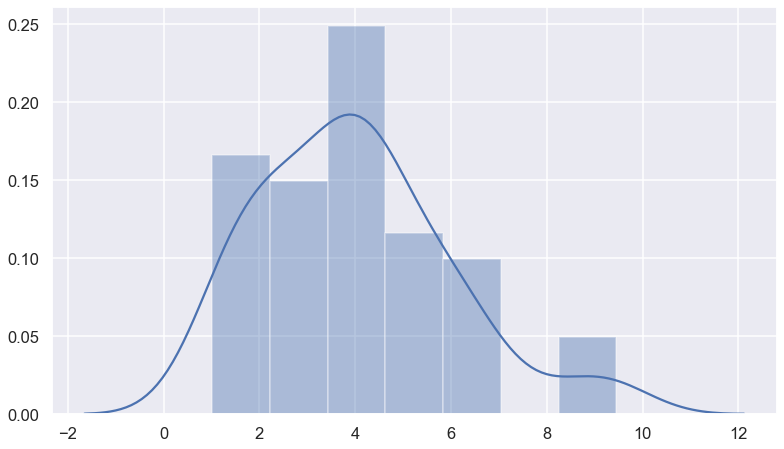

In [24]:
n = 50
sigma = 2.
m = 4.3

# генерируем выборку
x = np.random.normal(m, sigma, (n, ))

mean_x = x.mean()
print(f'Оценка мат. ожидания: {mean_x:.3f}')
sns.displot(x, kde=True)

# Вычислим оценку среднеквадратического отклонения
sigma_x = x.std()
print(f'Оценка СКО: {sigma_x:.4f}')

In [25]:
standard_error = sigma_x / np.sqrt(n)
t_score = (mean_x - 4.5)/standard_error
t_score

-1.766275575768385

In [26]:
p = stats.t.cdf(t_score, df=n-1)
print(f'Значение p-value: {p:.4f}')
if p > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение p-value: 0.0418
Основная гипотеза отклоняется


In [27]:
res = stats.ttest_1samp(x, popmean=4.5, alternative='less')
print(f'Значение t-статистики: {res.statistic:.4f}')
print(f'Значение p-value: {res.pvalue:.4f}')
if res.pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение t-статистики: -1.7485
Значение p-value: 0.0433
Основная гипотеза отклоняется


In [28]:
p = 1 - stats.t.cdf(t_score, df=n-1)
print(f'Значение p-value: {p:.4f}')
if p > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение p-value: 0.9582
Основная гипотеза принимается


In [29]:
res = stats.ttest_1samp(x, popmean=4.5, alternative='greater')
print(f'Значение t-статистики: {res.statistic:.4f}')
print(f'Значение p-value: {res.pvalue:.4f}')
if res.pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение t-статистики: -1.7485
Значение p-value: 0.9567
Основная гипотеза принимается


In [30]:
p = 2*min(stats.t.cdf(t_score, df=n-1), (1 - stats.t.cdf(t_score, df=n-1)))
print(f'Значение p-value: {p:.4f}')
if p > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение p-value: 0.0836
Основная гипотеза принимается


In [31]:
res = stats.ttest_1samp(x, popmean=4.5, alternative='two-sided')
print(f'Значение t-статистики: {res.statistic:.4f}')
print(f'Значение p-value: {res.pvalue:.4f}')
if res.pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение t-статистики: -1.7485
Значение p-value: 0.0866
Основная гипотеза принимается


# Гипотеза о равенстве дисперсии постоянному значению

Генеральная совокупность распределена нормально. Кроме того есть основания полагать, что дисперсия  ${\sigma}^{2}$  равна 
некоторому фиксированному значению ${\sigma}_{0}^{2}$. Для проверки этого утверждения выдвинем гипотезу ${H}_{0}:{\sigma}^{2}={\sigma}_{0}^{2}$.

Для проверки это гипотезы используем статистику
$$\chi^2=\frac{(n-1)D_{x}}{\sigma_{0}^2}\;\;\; D_{x} = \sum_{i=1}^n \frac {x_{i}-M(x)}{n-1}$$
 
После вычисления значения $\chi^2$ -статистики нужно найти соответствующее  ${p}_{value}$

In [57]:
n = 50
m = 2.0
sigma = 3.9
sigma_0 = 3.5

x = np.random.normal(m, np.sqrt(sigma), (n, ))

mean_x = x.mean()
var_x = np.var(x, ddof=1)
print(f'Оценка мат. ожидания: {x.mean():.3f}')
print(f'Оценка дисперсии: {var_x:.4f}')

Оценка мат. ожидания: 1.803
Оценка дисперсии: 3.8468


In [67]:
var_x = 3.5**2
sigma_0 = 5.5**2
n=25
alpha = 0.05
chi_square_score = ((n - 1) * var_x) / (sigma_0)
print(f'Значение chi-статистики: {chi_square_score:.4f}')
p = stats.chi2.cdf(chi_square_score, df=n-1)
print(f'Значение p-value: {p:.8f}')
if p > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение chi-статистики: 9.7190
Значение p-value: 0.00438895
Основная гипотеза отклоняется


In [71]:
var_x = 3.5**2
sigma_0 = 1.5**2
n=25
alpha = 0.05
chi_square_score = ((n - 1) * var_x) / (sigma_0)
print(f'Значение chi-статистики: {chi_square_score:.4f}')
p = 1 - stats.chi2.cdf(chi_square_score, df=n-1)
print(f'Значение p-value: {p:.8f}')

if p > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение chi-статистики: 130.6667
Значение p-value: 0.00000000
Основная гипотеза отклоняется


In [72]:
def decision_rule(score, n, alpha=0.05, alternative='less'):
    if alternative == "less":
        q = stats.chi2.ppf(alpha, n - 1)
        if score <= q:
            print(f'Основная гипотеза отклоняется')
        else:
            print(f'Основная гипотеза принимается')
    elif alternative == "greater":
        q = stats.chi2.ppf(1 - alpha, n - 1)
        if score >= q:
            print(f'Основная гипотеза отклоняется')
        else:
            print(f'Основная гипотеза принимается')
    elif alternative == "two-sided":
        q1 = stats.chi2.ppf(alpha / 2, n - 1)
        q2 = stats.chi2.ppf(1 - (alpha / 2), n - 1)
        if score <= q1 or score >= q2:
            print(f'Основная гипотеза отклоняется')
        else:
            print(f'Основная гипотеза принимается')
    else:
        raise Exception("Вид альтернативной гипотезы выбран не верно")

In [73]:
decision_rule(chi_square_score, n, alternative="two-sided")

Основная гипотеза отклоняется


# Гипотеза о равенстве математических ожиданий

Имеются две выборки $X$ и $Y$, размером $n$ и $m$  соответственно. 
Выдвенем гипотезу о равенстве их мат. ожиданий $H_{0}: m_{x}=m_{y}$

Для ее проверки при известной общей дисперсии (и равенстве дисперсий) можно использовать $z$-критерий:
$$z=\frac{M(X) - M(Y)} {\sigma \sqrt {\frac{1}{n}+\frac{1}{m}}}$$

Для ее проверки при неизвестной общей дисперсии (и равенстве дисперсий) можно использовать $t$-критерий Стьюдента:
$$t=\frac{M(X) - M(Y)} {\sigma \sqrt {\frac{1}{n}+\frac{1}{m}}}$$

$$\sigma=\sqrt{ \frac{(n-1)D_{X}+(m-1)D_{Y}}{n+m-2} }$$

Для выборок с разными дисперсиями можно использовать следующий $t$-критерий Уэлча:
$$t=\frac{M(X) - M(Y)} {\sqrt {\frac{D_{x}}{n}+\frac{D_{y}}{m}}}$$

In [82]:
m_x = 3.95
m_y = 3.95

sigma_x = 2
sigma_y = 3
n_x = 50
n_y = 70

x = np.random.normal(m_x, sigma_x, (n_x, ))
y = np.random.normal(m_y, sigma_y, (n_y, ))

In [83]:
res = stats.ttest_ind(x, y, equal_var=False)
print(f'Значение статистики: {res.statistic:.4f}')
print(f'Значение p-value: {res.pvalue:.4f}')

if res.pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение статистики: -0.1490
Значение p-value: 0.8819
Основная гипотеза принимается


# Гипотеза о равенстве дисперсий

Имеются две выборки $X$ и $Y$, размером $n$ и $m$ соответственно. Выдвенем гипотезу о равенстве их дисперсий ${H}_{0}:\sigma_{x}^2=\sigma_{y}^2$ 

Для ее проверки при известной дисперсии (равенстве дисперсий) можно использовать критерий Фишера:
$$F=\frac{\max[D(X),D(Y)]}{\min[D(X),D(Y)]}$$

# Критерий Фишера

In [99]:
m_x = 3.95
m_y = 3.8

sigma_x = 2
sigma_y = 2
n_x = 25
n_y = 25

x = np.random.normal(m_x, sigma_x, (n_x, ))
y = np.random.normal(m_y, sigma_y, (n_y, ))

In [100]:
var_x = np.var(x, ddof=1)
var_y = np.var(y, ddof=1)
print(f'Оценка дисперсии для X: {var_x:.4f}')
print(f'Оценка дисперсии для Y: {var_y:.4f}')

Оценка дисперсии для X: 3.1264
Оценка дисперсии для Y: 3.4095


In [101]:
F_score = var_y / var_x
print(f'Значение статистики: {F_score:.4f}')

Значение статистики: 1.0906


In [106]:
pvalue = 1 - stats.f.cdf(F_score, n_y - 1, n_x - 1)
print(f'Значение p-value: {pvalue:.4f}')

if pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение p-value: 0.4168
Основная гипотеза принимается


# Критерий Бартлетта

In [107]:
res = stats.bartlett(x, y)
print(f'Значение статистики: {res.statistic:.4f}')
print(f'Значение p-value: {res.pvalue:.4f}')

if res.pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение статистики: 0.0442
Значение p-value: 0.8335
Основная гипотеза принимается


# Проверка гипотезы о принадлежности выборки нормальному закону

Дана генеральная совокупность, которая распределена по неизвестному закону распределения.
Есть основания полагать, что это  нормальный закон распределения. 

Для проверки этого утверждения выдвинем гипотезу  $H_{0}:F(X)=N(m,\sigma)$.

Существующие критерии:

- критерий  χ2  Пирсона;
- критерий Д'Агостино-Пирсона;
- критерий Жарка-Бера scipy.stats.jarque_bera;
- критерий Шапиро-Уилка scipy.stats.shapiro;
- критерий Андерсона-Дарлинга scipy.stats.anderson (не только для нормального)

In [108]:
x = np.random.normal(3, 1.5, size=100)

# тест Д'Агостино-Пирсона

In [109]:
_, p = stats.normaltest(x)
alpha = 0.01
print(f'p-value = {p:.4f}')

if p < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза принимается')

p-value = 0.5445
Нулевая гипотеза принимается


# тест Шапиро-Уилка

In [110]:
W, p = stats.shapiro(x)
alpha = 0.01

print(f'Значение статистики: {W:.4f}')
print(f'p-value = {p:.4f}')

if p < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза принимается')

Значение статистики: 0.9871
p-value = 0.4476
Нулевая гипотеза принимается


# Непараметрические критерии

In [133]:
seed(1)
x = 5 * np.random.randn(100) + 50
y = 5 * np.random.randn(100) + 51

mean_x = x.mean()
print(f'Оценка мат. ожидания для X: {mean_x:.3f}')
var_x = np.var(x, ddof=1)
print(f'Оценка дисперсии для X: {var_x:.4f}')

mean_y = y.mean()
print(f'Оценка мат. ожидания для Y: {mean_y:.3f}')
var_y = np.var(y, ddof=1)
print(f'Оценка дисперсии для Y: {var_y:.4f}')

Оценка мат. ожидания для X: 50.303
Оценка дисперсии для X: 19.7854
Оценка мат. ожидания для Y: 51.764
Оценка дисперсии для Y: 21.9347


# U-критерий Манна-Уитни

Непараметрический критерий статистической значимости для определения того, были ли взяты две независимые выборки из популяции с одинаковым распределением.

$H_{0}$: распределения выборок равны

$H_{1}$: распределения выборок различаются

In [134]:
alpha = 0.05
score, pvalue = stats.mannwhitneyu(x, y)
print(f'Значение статистики: {score:.4f}')
print(f'Значение p-value: {pvalue:.4f}')

if pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение статистики: 4025.0000
Значение p-value: 0.0086
Основная гипотеза отклоняется


# Тест Уилкоксона

Непараметрической критерий статистической значимости для сравнения двух выборок, которые являются парными или связанными. 

In [135]:
alpha = 0.05
score, pvalue = stats.wilcoxon(x, y)
print(f'Значение статистики: {score:.4f}')
print(f'Значение p-value: {pvalue:.4f}')

if pvalue > alpha:
    print(f'Основная гипотеза принимается')
else:
    print(f'Основная гипотеза отклоняется')

Значение статистики: 1886.0000
Значение p-value: 0.0280
Основная гипотеза отклоняется
